<a href="https://colab.research.google.com/github/pyagoubi/Stuff/blob/main/Weedsmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_excel('/content/drive/MyDrive/upwork3/WeedSmart_v6.xlsx')

df_clean = pd.read_excel('/content/drive/MyDrive/upwork3/WeedSmart_clean.xlsx')

df_clean =df_clean.replace('Commercial rep (e.g. chemical, machinery)', 'Commercial Rep')

# Location

In [ ]:
loc_col = [ 'Location','Occupation']
loc_summary = pd.DataFrame(df_clean[['Location', 'Occupation']].groupby('Location').count()).rename(columns = {'Occupation':'Number of entries'})

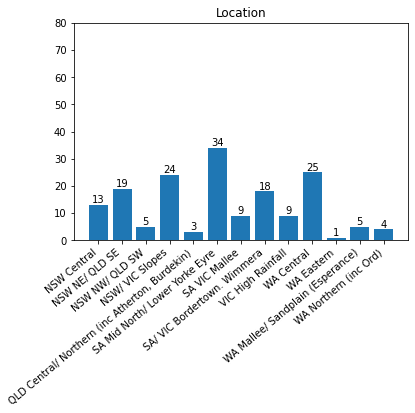

In [ ]:
fig, ax = plt.subplots(1,1)
plt.title('Location')
ax.bar(loc_summary.index,loc_summary['Number of entries'])
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 80)
plt.show()

In [ ]:
df_clean[loc_col].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10,10))

In [ ]:
loc= df_clean[loc_col].value_counts().unstack().fillna(0)

In [ ]:
loc=loc.reset_index()
loc.columns

Index(['Location', 'Academic', 'Agronomist', 'Commercial Rep', 'Farm employee',
       'Farm owner', 'Other (please specify)'],
      dtype='object', name='Occupation')

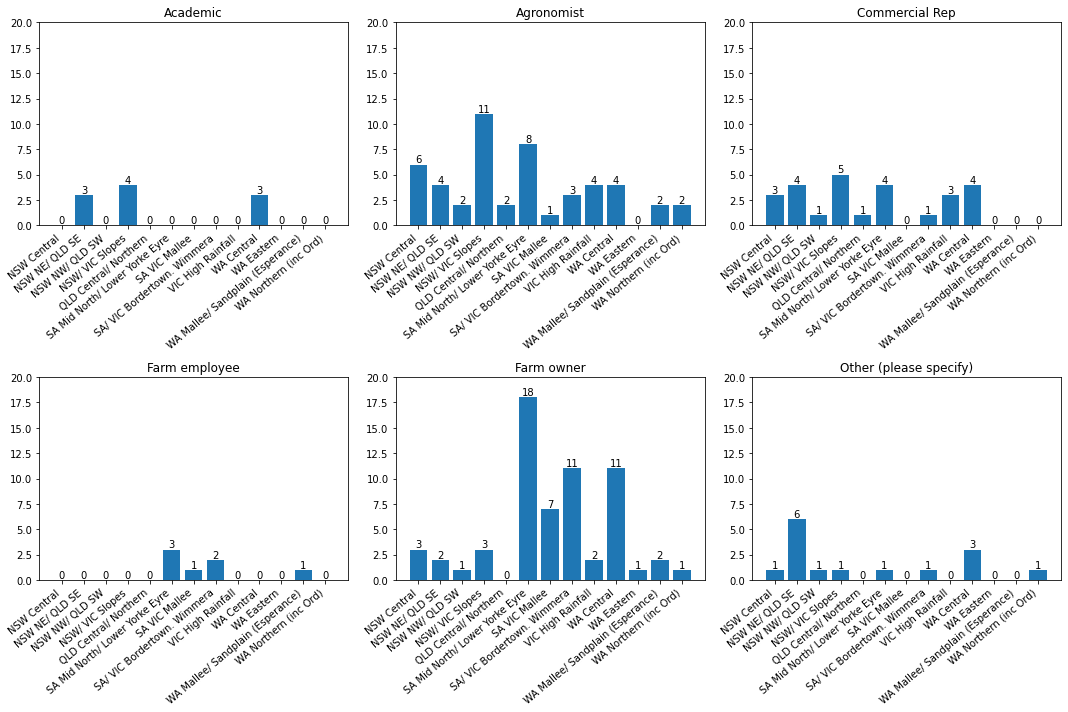

In [ ]:
cols = loc.columns[1:]
fig, ax = plt.subplots(2,3, figsize=(15,10))
#fig.suptitle('Herbicide resistance testing',fontsize=16)
row=0
col=[0,1,2]*2
for i, column in enumerate(cols):
    plot_fig = pd.DataFrame(loc.loc[:, ['Location', column]].groupby('Location')[column].sum())
    if (i!=0)&(i%3==0):
        row+=1
    axs = ax[row,col[i]]
    axs.bar(plot_fig.index,plot_fig[column])
    axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
    axs.set_title(column )
    axs.bar_label(axs.containers[0], label_type='edge')
    axs.set_ylim(0, 20)
fig.tight_layout()

# Occupation

In [ ]:
pd.DataFrame(df_clean['Occupation'].value_counts())

,Occupation
Farm owner,70
Agronomist,51
Commercial Rep,29
Other (please specify),23
Academic,13
Farm employee,7


In [ ]:
occ= pd.DataFrame(df_clean['Occupation'].value_counts()).rename(columns={'Occupation':'Number of entries'})

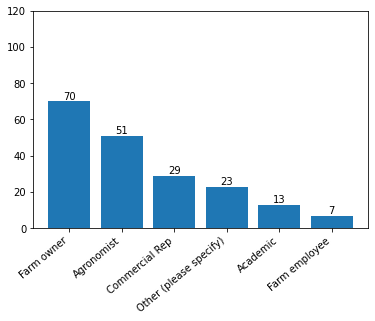

In [ ]:


fig, ax = plt.subplots(1,1)
#plt.title('Herbicide resistance testing')
ax.bar(occ.index,occ['Number of entries'])
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 120)
plt.show()

# Crops

## Data

,Number of entries
Green Manured,1
Brown Manured,19
Wheat,70
Barley,65
Canola,49
Oats,22
Lentils,37
Chickpeas,10
Lupins,17
Peas,19


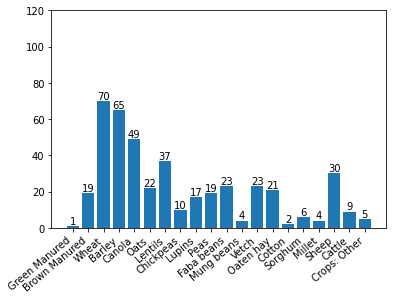

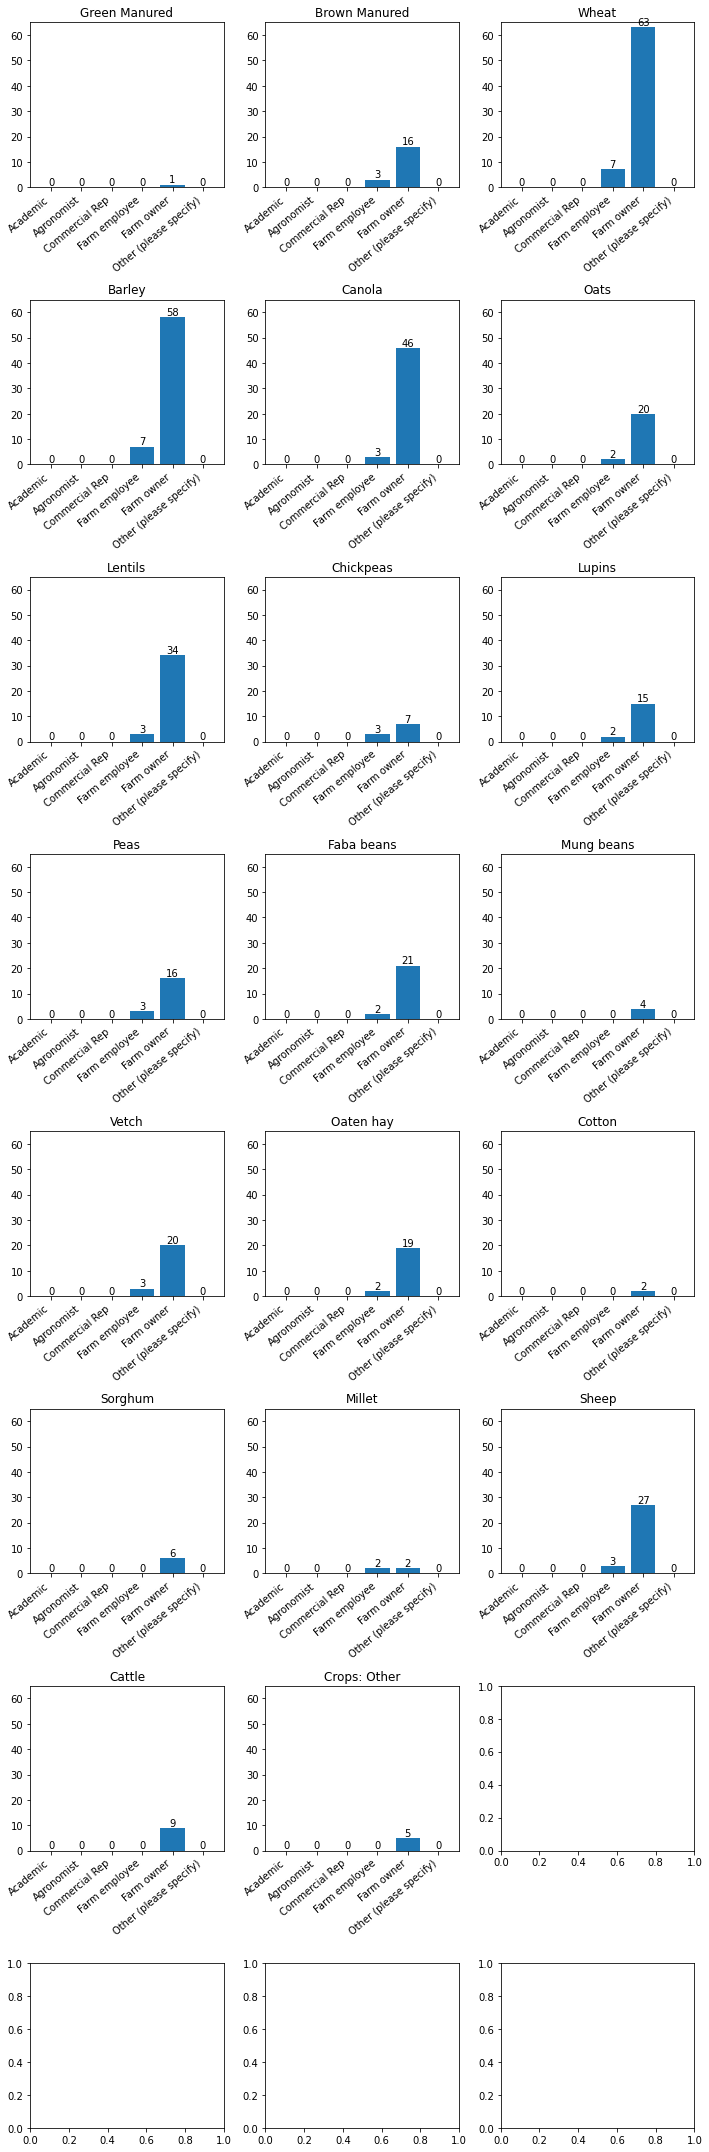

In [ ]:
crop_cols = ['Occupation', 
             'Green Manured',
             'Brown Manured','Wheat','Barley',
             'Canola','Oats','Lentils','Chickpeas',
             'Lupins','Peas','Faba beans','Mung beans',
             'Vetch','Oaten hay','Cotton','Sorghum','Millet',
             'Sheep','Cattle','Crops: Other']


#df_clean = pd.read_excel('/content/drive/MyDrive/upwork3/WeedSmart_clean.xlsx')

crop_summary = pd.DataFrame(df_clean[crop_cols].groupby('Occupation').count().sum(), columns = ['Number of entries'])
display(crop_summary)

print('\n\n\n')
fig, ax = plt.subplots(1,1)
#plt.title('Herbicide resistance testing')
ax.bar(crop_summary.index,crop_summary['Number of entries'])
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 120)
plt.show()

print('\n\n\n')
print('\n\n\n')

cols = crop_cols[1:]
fig, ax = plt.subplots(8,3, figsize=(10,30))
#fig.suptitle('Herbicide resistance testing',fontsize=16)
row=0
col=[0,1,2]*8
for i, column in enumerate(cols):
    plot_fig = pd.DataFrame(df_clean.loc[:, ['Occupation', column]].groupby('Occupation')[column].count())
    if (i!=0)&(i%3==0):
        row+=1
    axs = ax[row,col[i]]
    axs.bar(plot_fig.index,plot_fig[column])
    axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
    axs.set_title(column )
    axs.bar_label(axs.containers[0], label_type='edge')
    axs.set_ylim(0, 65)
fig.tight_layout()

# Area

In [4]:
data =data.rename(columns = {'On average, how much area (in hectares) does your farm business crop each year?': 'Area'})
data['Area'].fillna(0, inplace = True)

In [6]:
pd.DataFrame(data[data['Area']>0].groupby('Occupation')['Area'].mean()).round(decimals =2)

,Area
Occupation,
Farm employee,1934.29
Farm owner,2184.71


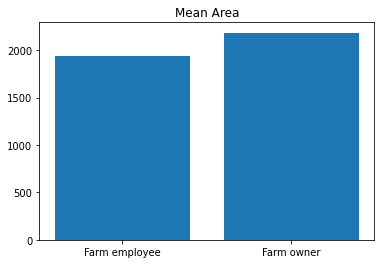

In [ ]:
area_df = pd.DataFrame(data[data['Area']>0].groupby('Occupation')['Area'].mean())
area_df
plt.bar(area_df.index, area_df['Area'])
plt.title('Mean Area')
plt.show()

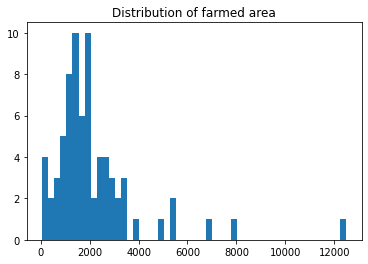

In [ ]:
plt.title('Distribution of farmed area')
plt.hist(data.loc[data['Area']>0, 'Area'], bins =50)
plt.show()

# Rotate Crops

,Number of entries
Single Break,75
Double Break,51
Fallow phase,26
Pasture phase,43
RC: Not practiced,5
RC: Other,5


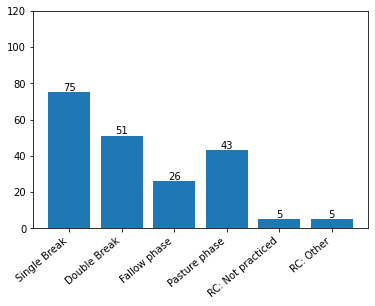

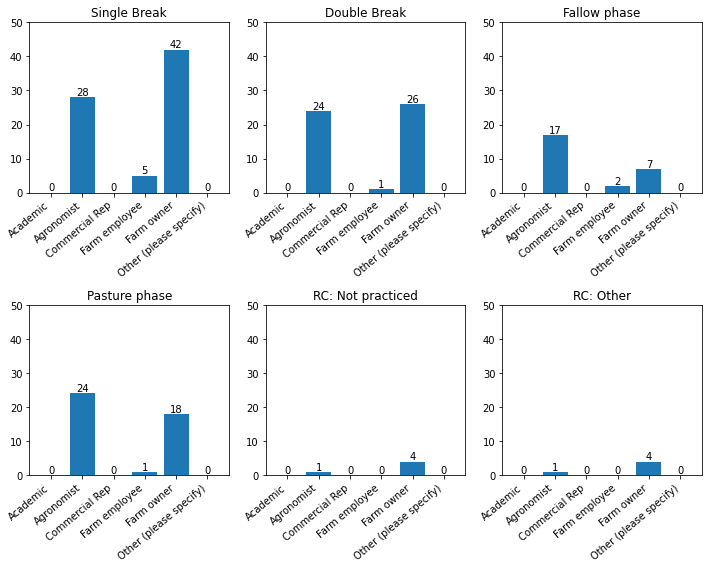

In [ ]:
rc_cols = ['Occupation', 
             'Single Break','Double Break','Fallow phase','Pasture phase','RC: Not practiced','RC: Other']


#df_clean = pd.read_excel('/content/drive/MyDrive/upwork3/WeedSmart_clean.xlsx')

rc_summary = pd.DataFrame(df_clean[rc_cols].groupby('Occupation').count().sum(), columns = ['Number of entries'])
display(rc_summary)

print('\n\n\n')
fig, ax = plt.subplots(1,1)
#plt.title('Herbicide resistance testing')
ax.bar(rc_summary.index,rc_summary['Number of entries'])
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 120)
plt.show()

print('\n\n\n')
print('\n\n\n')

cols = rc_cols[1:]
fig, ax = plt.subplots(2,3, figsize=(10,8))
#fig.suptitle('Herbicide resistance testing',fontsize=16)
row=0
col=[0,1,2]*2
for i, column in enumerate(cols):
    plot_fig = pd.DataFrame(df_clean.loc[:, ['Occupation', column]].groupby('Occupation')[column].count())
    if (i!=0)&(i%3==0):
        row+=1
    axs = ax[row,col[i]]
    axs.bar(plot_fig.index,plot_fig[column])
    axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
    axs.set_title(column )
    axs.bar_label(axs.containers[0], label_type='edge')
    axs.set_ylim(0, 50)
fig.tight_layout()

# Increase crop competition on

In [ ]:
df_incr = pd.read_excel('/content/drive/MyDrive/upwork3/incr_df.xlsx')
inc_summary = pd.DataFrame(df_incr.groupby('Occupation').count().sum(), columns = ['Number of entries'])
display(inc_summary)

,Number of entries
Narrow row spacing (25 cm or less),51
Paired rows,11
Higher sowing rate to increase crop competition with weeds,69
East-west sowing,31
Sow early to increase crop competitiveness with weeds,69
Consider the competitive ability of varieties when selecting varieties,60
Not practiced,5
Other,2


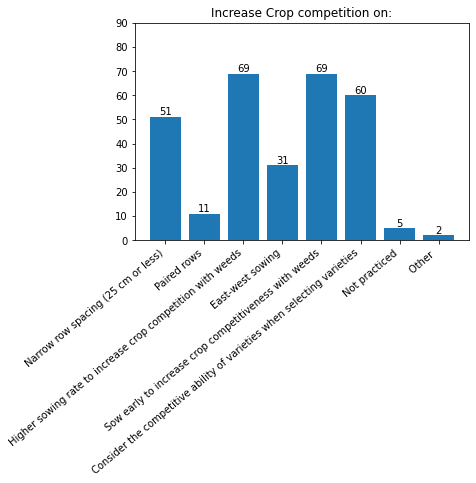

In [ ]:
fig, ax = plt.subplots(1,1)
plt.title('Increase Crop competition on:')
ax.bar(inc_summary.index,inc_summary['Number of entries'])
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 90)
plt.show()

In [ ]:
df_incr = df_incr.rename(columns = {'Sow early to increase crop competitiveness with weeds': 'Sow early', 
                          'Consider the competitive ability of varieties when selecting varieties':'Consider the competitive ability' })

In [ ]:
df_incr =df_incr.replace('Commercial rep (e.g. chemical, machinery)', 'Commercial Rep')

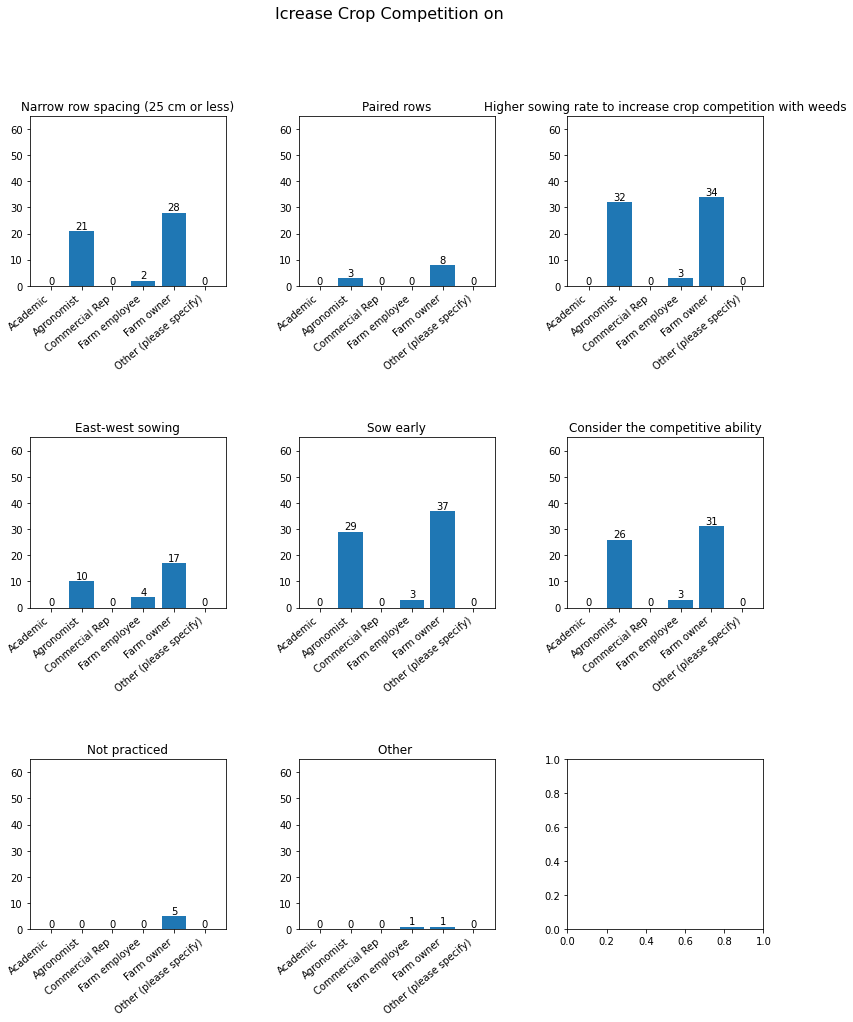

In [ ]:

cols = df_incr.columns[1:]
fig, ax = plt.subplots(3,3, figsize=(12,15))
fig.suptitle('Icrease Crop Competition on',fontsize=16)
row=0
col=[0,1,2]*3
for i, column in enumerate(cols):
    plot_fig = pd.DataFrame(df_incr.loc[:, ['Occupation', column]].groupby('Occupation')[column].count())
    if (i!=0)&(i%3==0):
        row+=1
    axs = ax[row,col[i]]
    axs.bar(plot_fig.index,plot_fig[column])
    axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
    axs.set_title(column )
    axs.bar_label(axs.containers[0], label_type='edge')
    axs.set_ylim(0, 65)
fig.tight_layout(pad = 5)

# Soil Amelioration

,Number of entries
Single Break,75
Double Break,51
Fallow phase,26
Pasture phase,43
RC: Not practiced,5
RC: Other,5


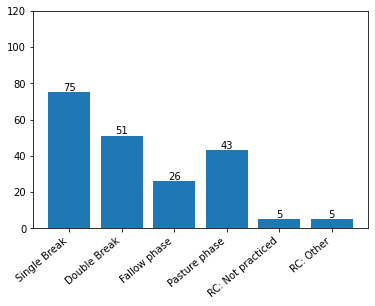

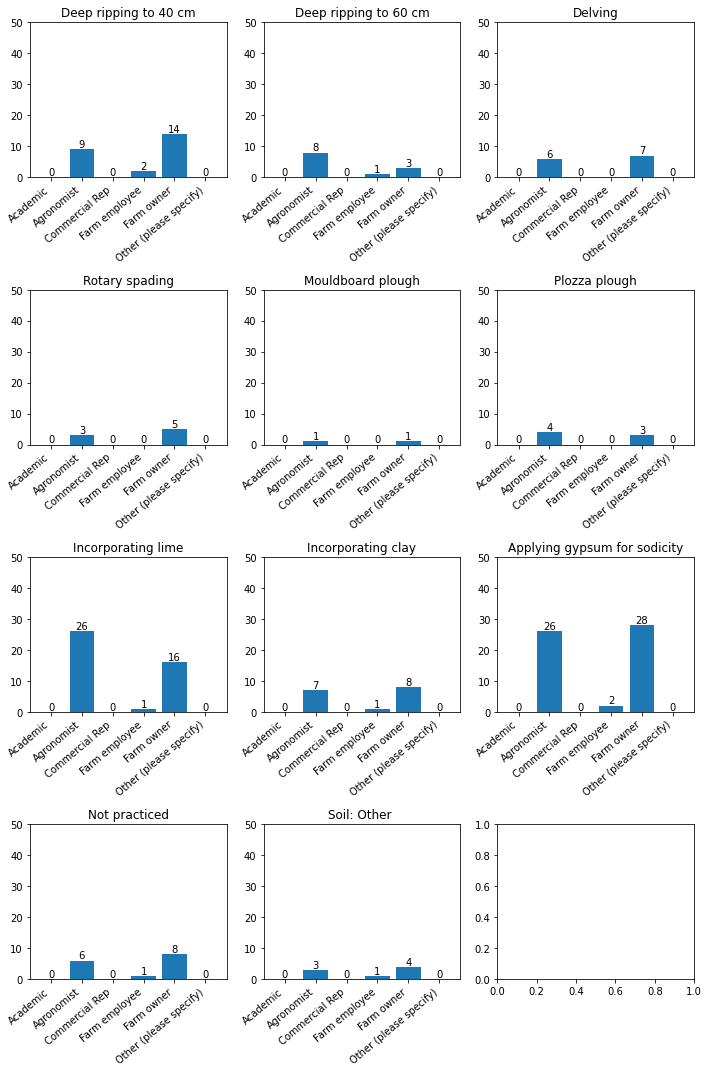

In [ ]:
soil_cols = ['Occupation', 
             'Deep ripping to 40 cm',
           'Deep ripping to 60 cm','Delving',
           'Rotary spading','Mouldboard plough',
           'Plozza plough','Incorporating lime',
           'Incorporating clay','Applying gypsum for sodicity',
           'Not practiced','Soil: Other ']


#df_clean = pd.read_excel('/content/drive/MyDrive/upwork3/WeedSmart_clean.xlsx')

soil_summary = pd.DataFrame(df_clean[rc_cols].groupby('Occupation').count().sum(), columns = ['Number of entries'])
display(soil_summary)

print('\n\n\n')
fig, ax = plt.subplots(1,1)
#plt.title('Herbicide resistance testing')
ax.bar(soil_summary.index,soil_summary['Number of entries'])
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 120)
plt.show()

print('\n\n\n')
print('\n\n\n')

cols = soil_cols[1:]
fig, ax = plt.subplots(4,3, figsize=(10,15))
#fig.suptitle('Herbicide resistance testing',fontsize=16)
row=0
col=[0,1,2]*4
for i, column in enumerate(cols):
    plot_fig = pd.DataFrame(df_clean.loc[:, ['Occupation', column]].groupby('Occupation')[column].count())
    if (i!=0)&(i%3==0):
        row+=1
    axs = ax[row,col[i]]
    axs.bar(plot_fig.index,plot_fig[column])
    axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
    axs.set_title(column )
    axs.bar_label(axs.containers[0], label_type='edge')
    axs.set_ylim(0, 50)
fig.tight_layout()

# Mix and rotate herbicides

In [9]:
df_double = pd.read_excel('/content/drive/MyDrive/upwork3/double.xlsx')

df_mix=df_double[['Occupation', 'Mix and rotate herbicides(%)']]
df_mix = df_mix.fillna(0)
df_mix['Mix and rotate herbicides(%)'] = df_mix['Mix and rotate herbicides(%)'] *100

pd.options.display.float_format = '{:,.2f}'.format
df_mix.groupby('Occupation').mean()

,Mix and rotate herbicides(%)
Occupation,
Academic,0.00
Agronomist,40.39
"Commercial rep (e.g. chemical, machinery)",0.00
Farm employee,42.86
Farm owner,43.71
Other (please specify),0.00


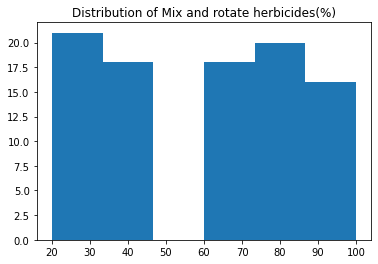

In [11]:
plt.title('Distribution of Mix and rotate herbicides(%)')
plt.hist(df_mix.loc[df_mix['Mix and rotate herbicides(%)']>0, 'Mix and rotate herbicides(%)'], bins =6)
plt.show()

# Double knock to preserve glyphosate

In [ ]:
'Double paraquat: paraquat followed by paraquat','Double paraquat: paraquat followed by paraquat + group 14 (group G)','Double knock: herbicide x 2, e.g. glyphosate followed by paraquat',
'Double knock: herbicide + cultivation',
'Double knock: herbicide + grazing','Double: Not practiced','Double: Other',

In [7]:
#df_clean = pd.read_excel('/content/drive/MyDrive/upwork3/WeedSmart_clean.xlsx')

dknock_col = ['Occupation', 
              'Double paraquat: paraquat followed by paraquat','Double paraquat: paraquat followed by paraquat + group 14 (group G)','Double knock: herbicide x 2, e.g. glyphosate followed by paraquat',
              'Double knock: herbicide + cultivation',
                'Double knock: herbicide + grazing','Double: Not practiced','Double: Other']


dknock_summary = pd.DataFrame(df_clean[dknock_col].groupby('Occupation').count().sum(), columns = ['Number of entries'])
display(dknock_summary)

,Number of entries
Double paraquat: paraquat followed by paraquat,14
Double paraquat: paraquat followed by paraquat + group 14 (group G),17
"Double knock: herbicide x 2, e.g. glyphosate followed by paraquat",95
Double knock: herbicide + cultivation,10
Double knock: herbicide + grazing,20
Double: Not practiced,3
Double: Other,5


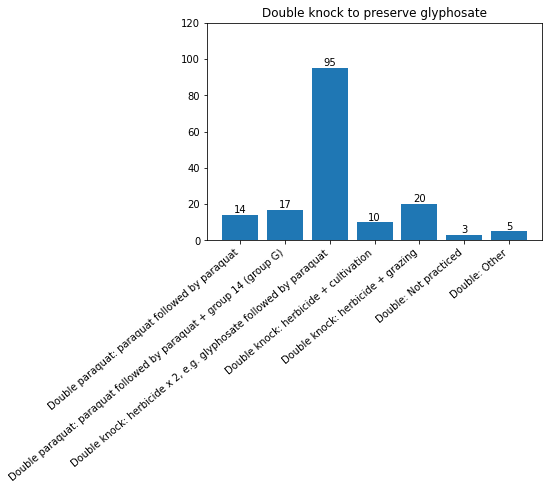

In [8]:
fig, ax = plt.subplots(1,1)
plt.title('Double knock to preserve glyphosate')
ax.bar(dknock_summary.index,dknock_summary['Number of entries'])
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 120)
plt.show()

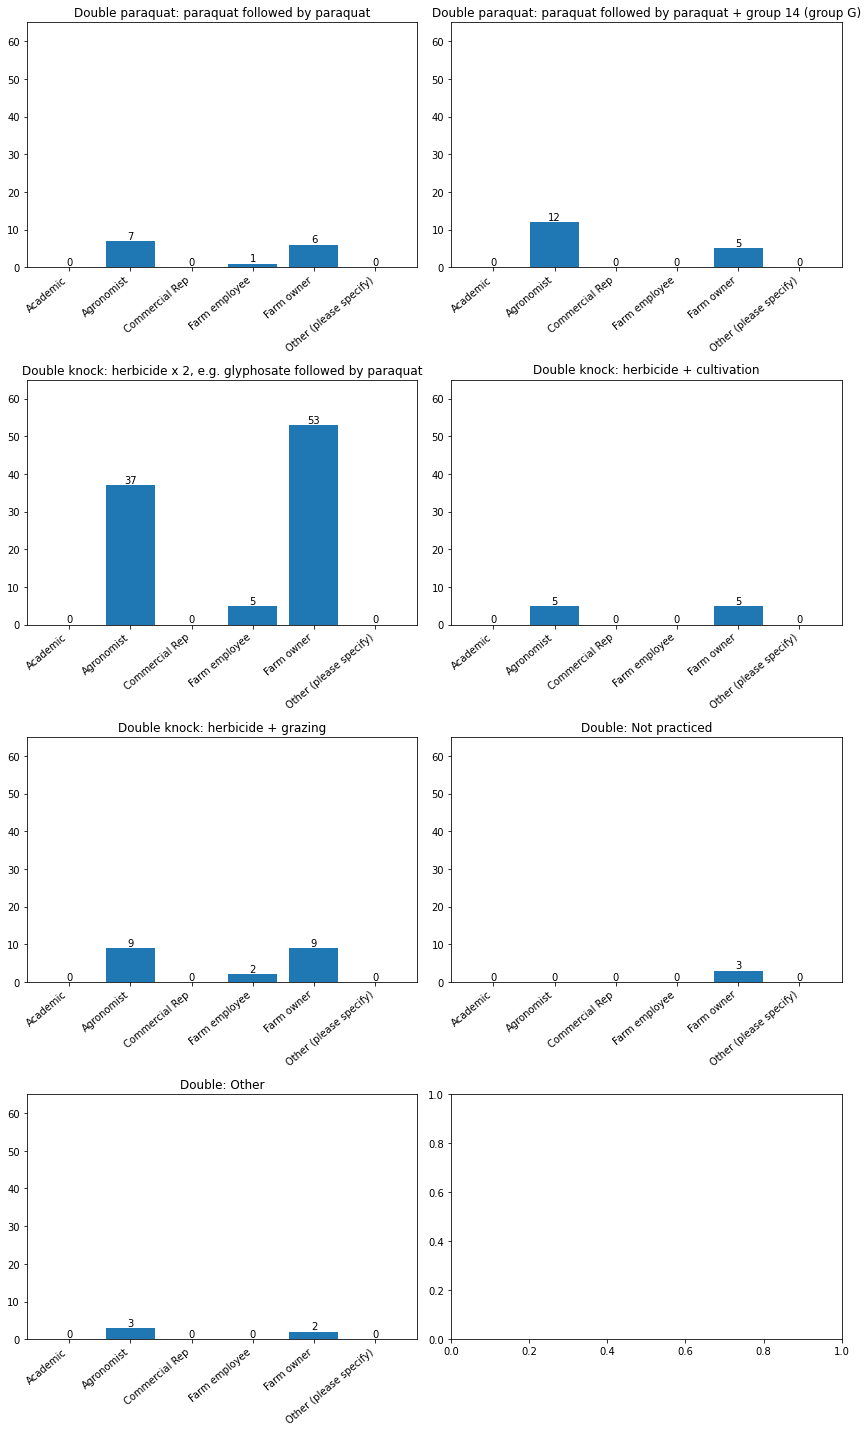

In [ ]:
cols = dknock_col[1:]
fig, ax = plt.subplots(4,2, figsize=(12,20))
#fig.suptitle('Double knock to preserve glyphosate',fontsize=16)
row=0
col=[0,1]*4
for i, column in enumerate(cols):
    plot_fig = pd.DataFrame(df_clean.loc[:, ['Occupation', column]].groupby('Occupation')[column].count())
    if (i!=0)&(i%2==0):
        row+=1
    axs = ax[row,col[i]]
    axs.bar(plot_fig.index,plot_fig[column])
    axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
    axs.set_title(column )
    axs.bar_label(axs.containers[0], label_type='edge')
    axs.set_ylim(0, 65)
fig.tight_layout()

# Stop weed seed set

In [ ]:
df_clean = pd.read_excel('/content/drive/MyDrive/upwork3/WeedSmart_clean.xlsx')

stop_col = ['Occupation','Crop top canola, pulses, wheat or feed barley',
            'Cut hay or silage','Brown manure or long fallow',
            'Spraytop pasture','Windrow (swath)',
            'Optical spot spraying',
            'Not practiced','Stop weed seed set  Other']


stop_summary = pd.DataFrame(df_clean[stop_col].groupby('Occupation').count().sum(), columns = ['Number of entries'])
display(stop_summary)

,Number of entries
"Crop top canola, pulses, wheat or feed barley",70
Cut hay or silage,56
Brown manure or long fallow,33
Spraytop pasture,46
Windrow (swath),39
Optical spot spraying,14
Not practiced,5
Stop weed seed set Other,3


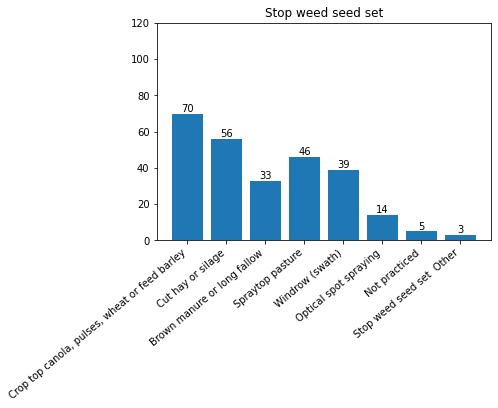

In [ ]:
fig, ax = plt.subplots(1,1)
plt.title('Stop weed seed set')
ax.bar(stop_summary.index,stop_summary['Number of entries'])
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 120)
plt.show()

In [ ]:
df_clean =df_clean.replace('Commercial rep (e.g. chemical, machinery)', 'Commercial Rep')

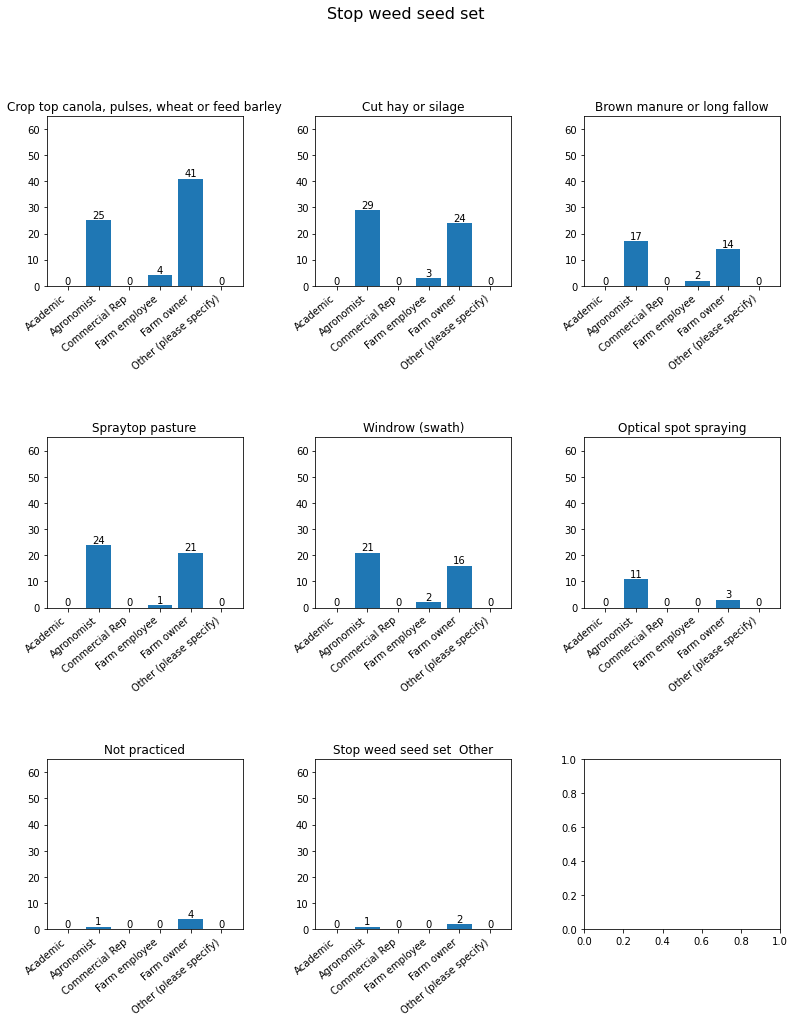

In [ ]:
cols = stop_col[1:]
fig, ax = plt.subplots(3,3, figsize=(12,15))
fig.suptitle('Stop weed seed set',fontsize=16)
row=0
col=[0,1,2]*3
for i, column in enumerate(cols):
    plot_fig = pd.DataFrame(df_clean.loc[:, ['Occupation', column]].groupby('Occupation')[column].count())
    if (i!=0)&(i%3==0):
        row+=1
    axs = ax[row,col[i]]
    axs.bar(plot_fig.index,plot_fig[column])
    axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
    axs.set_title(column )
    axs.bar_label(axs.containers[0], label_type='edge')
    axs.set_ylim(0, 65)
fig.tight_layout(pad = 5)

# Herbicide resistance testing 

,Number of entries
Quick-test (during the season),23
Seed testing (at the end of the season),54
Not practiced,5
Herbicide resistance testing Other,2


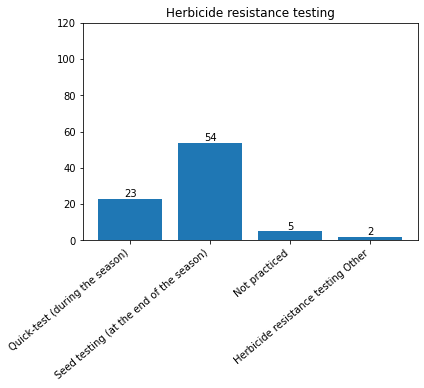

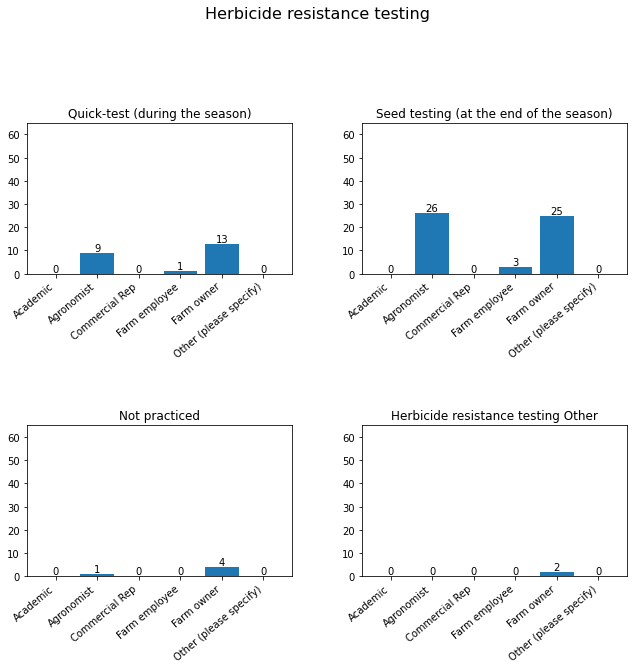

In [ ]:
htest_cols = ['Occupation', 'Quick-test (during the season)',
'Seed testing (at the end of the season)',
'Not practiced','Herbicide resistance testing Other']


#df_clean = pd.read_excel('/content/drive/MyDrive/upwork3/WeedSmart_clean.xlsx')

ht_summary = pd.DataFrame(df_clean[htest_cols].groupby('Occupation').count().sum(), columns = ['Number of entries'])
display(ht_summary)

print('\n\n\n')
fig, ax = plt.subplots(1,1)
plt.title('Herbicide resistance testing')
ax.bar(ht_summary.index,ht_summary['Number of entries'])
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 120)
plt.show()

print('\n\n\n')
print('\n\n\n')

cols = htest_cols[1:]
fig, ax = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('Herbicide resistance testing',fontsize=16)
row=0
col=[0,1]*2
for i, column in enumerate(cols):
    plot_fig = pd.DataFrame(df_clean.loc[:, ['Occupation', column]].groupby('Occupation')[column].count())
    if (i!=0)&(i%2==0):
        row+=1
    axs = ax[row,col[i]]
    axs.bar(plot_fig.index,plot_fig[column])
    axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
    axs.set_title(column )
    axs.bar_label(axs.containers[0], label_type='edge')
    axs.set_ylim(0, 65)
fig.tight_layout(pad = 5)

# Implement harvest weed seed control

,Number of entries
Quick-test (during the season),23
Seed testing (at the end of the season),54
Not practiced,5
Herbicide resistance testing Other,2


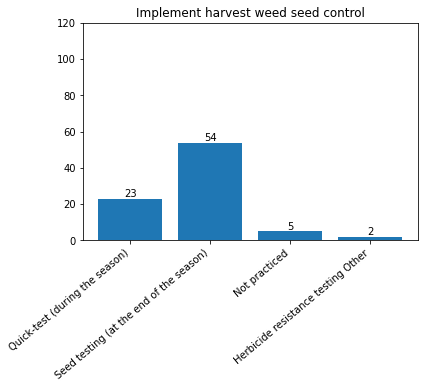

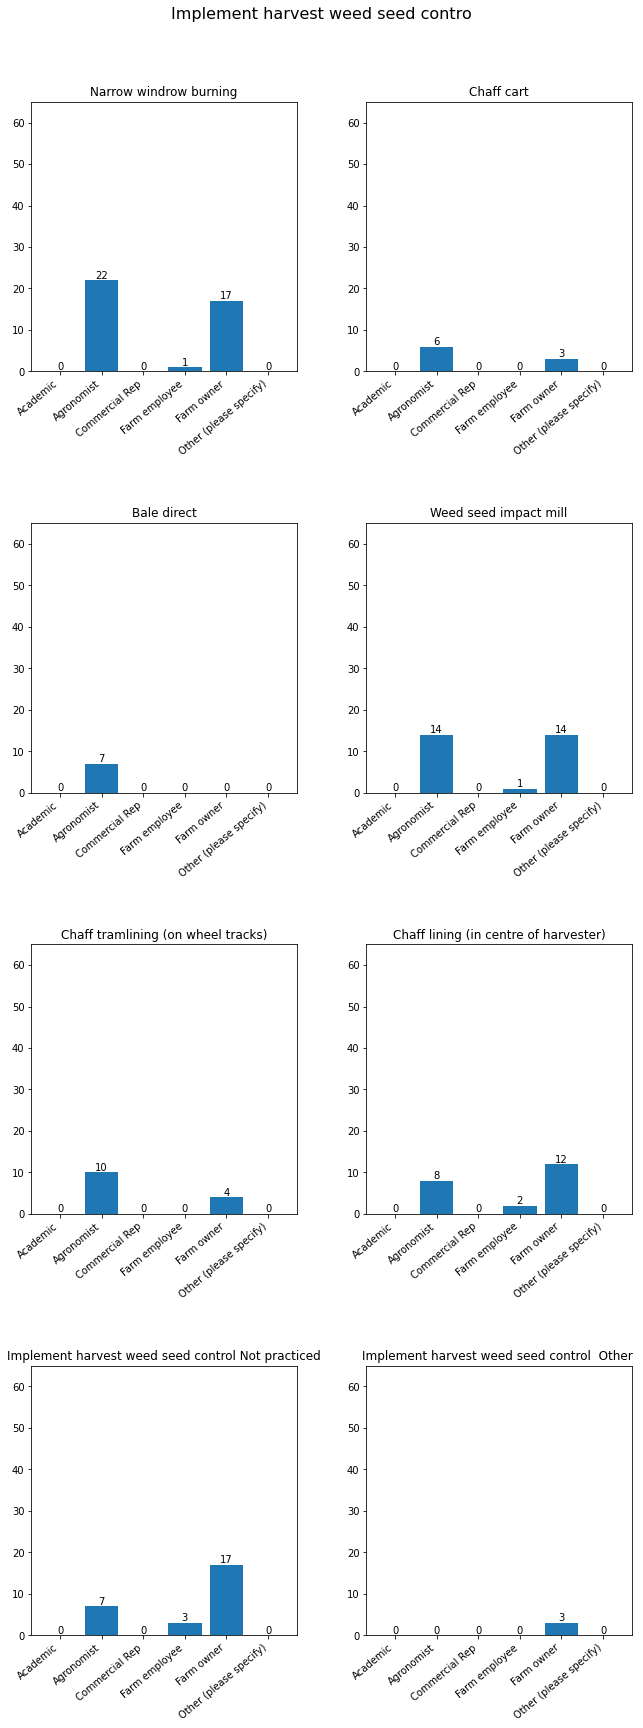

In [ ]:
wsc_cols = ['Occupation', 'Narrow windrow burning',
              'Chaff cart','Bale direct',
              'Weed seed impact mill',
              'Chaff tramlining (on wheel tracks)',
              'Chaff lining (in centre of harvester)',
              'Implement harvest weed seed control Not practiced',
              'Implement harvest weed seed control  Other ',]


#df_clean = pd.read_excel('/content/drive/MyDrive/upwork3/WeedSmart_clean.xlsx')

wsc_summary = pd.DataFrame(df_clean[htest_cols].groupby('Occupation').count().sum(), columns = ['Number of entries']) ####
display(wsc_summary) ###

print('\n\n\n')
fig, ax = plt.subplots(1,1)
plt.title('Implement harvest weed seed control') ###
ax.bar(wsc_summary.index,ht_summary['Number of entries'])  ####
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 120)
plt.show()

print('\n\n\n')
print('\n\n\n')

cols = wsc_cols[1:] ###
fig, ax = plt.subplots(4,2, figsize=(10,25))
fig.suptitle('Implement harvest weed seed contro',fontsize=16) ###
row=0
col=[0,1]*4
for i, column in enumerate(cols):
    plot_fig = pd.DataFrame(df_clean.loc[:, ['Occupation', column]].groupby('Occupation')[column].count())
    if (i!=0)&(i%2==0):
        row+=1
    axs = ax[row,col[i]]
    axs.bar(plot_fig.index,plot_fig[column])
    axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
    axs.set_title(column )
    axs.bar_label(axs.containers[0], label_type='edge')
    axs.set_ylim(0, 65)
fig.tight_layout(pad = 5)

# Engagement with Weedsmart

In [ ]:
ws = pd.read_excel('/content/drive/MyDrive/upwork3/WeedSmart_v7_weedsmart.xlsx')

In [ ]:
ws =ws.replace('Commercial rep (e.g. chemical, machinery)', 'Commercial Rep')

In [ ]:
plot_df_ws=ws.iloc[:, :16]
cols = list(plot_df_ws.columns[4:15])

cols_o = cols.append('Occupation')

In [ ]:
cols

['Email newsletter',
 ' Website',
 'Facebook',
 ' Twitter',
 'Podcasts',
 'Webinars',
 'Online courses',
 'Face-to-face workshops',
 'Field days',
 'WeedSmart Week',
 'Conferences',
 'Occupation']

,Number of entries
Email newsletter,111
Website,67
Facebook,21
Twitter,63
Podcasts,61
Webinars,52
Online courses,30
Face-to-face workshops,27
Field days,32
WeedSmart Week,36


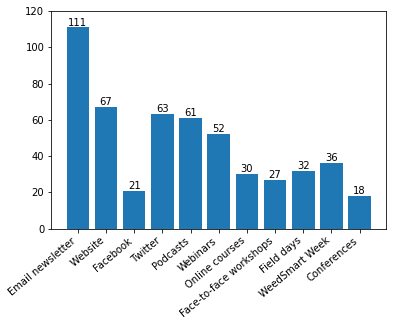

In [ ]:
ws_summary = pd.DataFrame(ws[cols].groupby('Occupation').count().sum(), columns = ['Number of entries']) ####
display(ws_summary) ###

print('\n\n\n')
fig, ax = plt.subplots(1,1)
#plt.title('Implement harvest weed seed control') ###
ax.bar(ws_summary.index,ws_summary['Number of entries'])  ####
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 120)
plt.show()

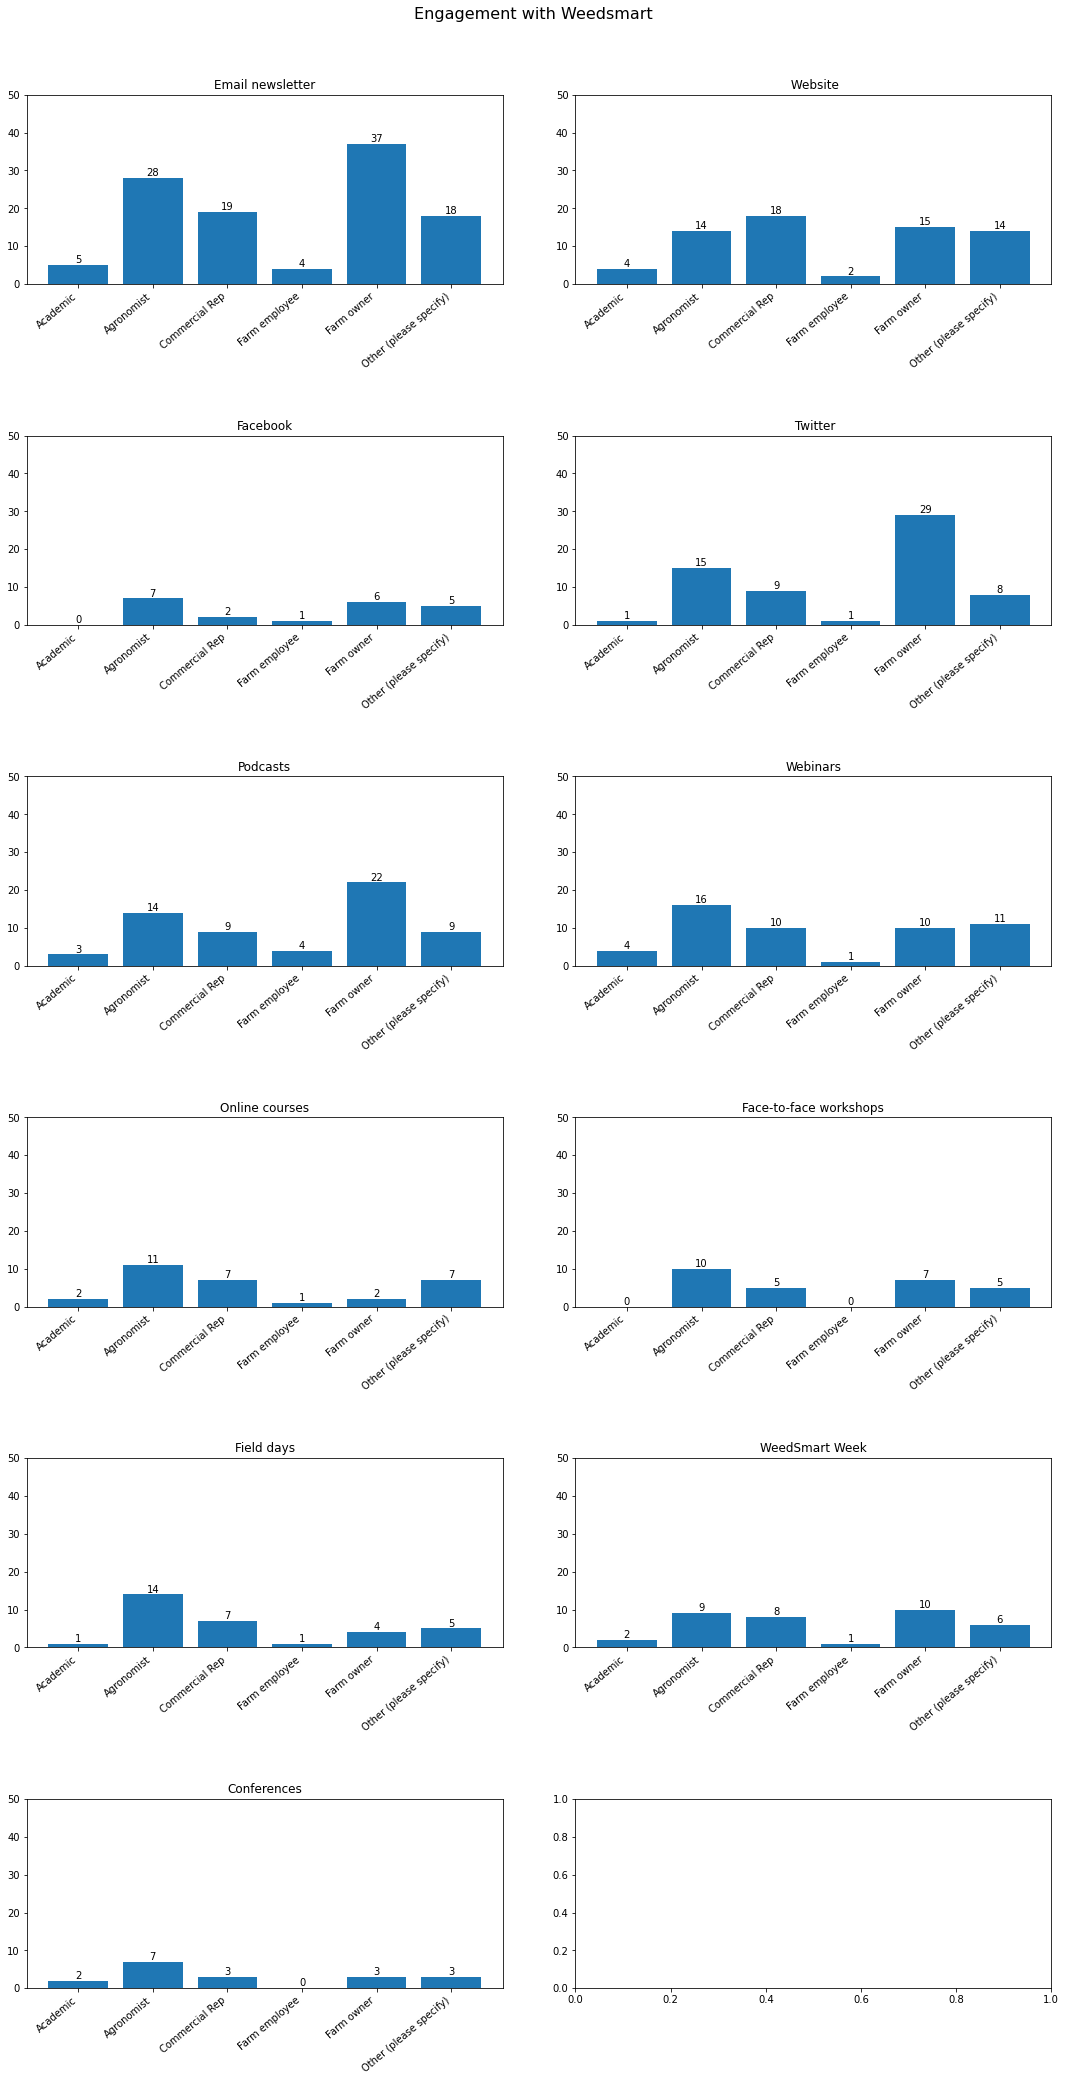

In [ ]:
plot_df_ws=ws.iloc[:, :16]
cols = plot_df_ws.columns[4:15]
fig, ax = plt.subplots(6,2, figsize=(16,30))
fig.suptitle('Engagement with Weedsmart',fontsize=16)
row=0
col=[0,1]*6
for i, column in enumerate(cols):
    plot_fig = pd.DataFrame(ws.loc[:, ['Occupation', column]].groupby('Occupation')[column].count())
    if (i!=0)&(i%2==0):
        row+=1
    axs = ax[row,col[i]]
    axs.bar(plot_fig.index,plot_fig[column])
    axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
    axs.set_title(column )
    axs.bar_label(axs.containers[0], label_type='edge')
    axs.set_ylim(0, 50)
fig.tight_layout(pad = 5)

# Relevance of Information

(0.0, 12.0)

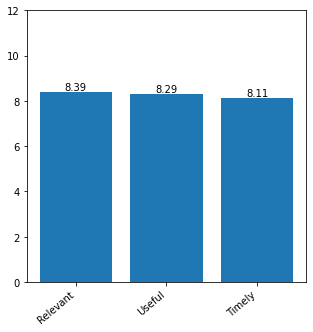

In [17]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

cols = ['Relevant', 'Useful', 'Timely']




ax.bar(cols,np.round(df_clean[cols].mean(), decimals =2))
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
#axs.set_title(column )
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 12)

In [18]:
df_clean[cols].mean()

Relevant   8.39
Useful     8.29
Timely     8.11
dtype: float64

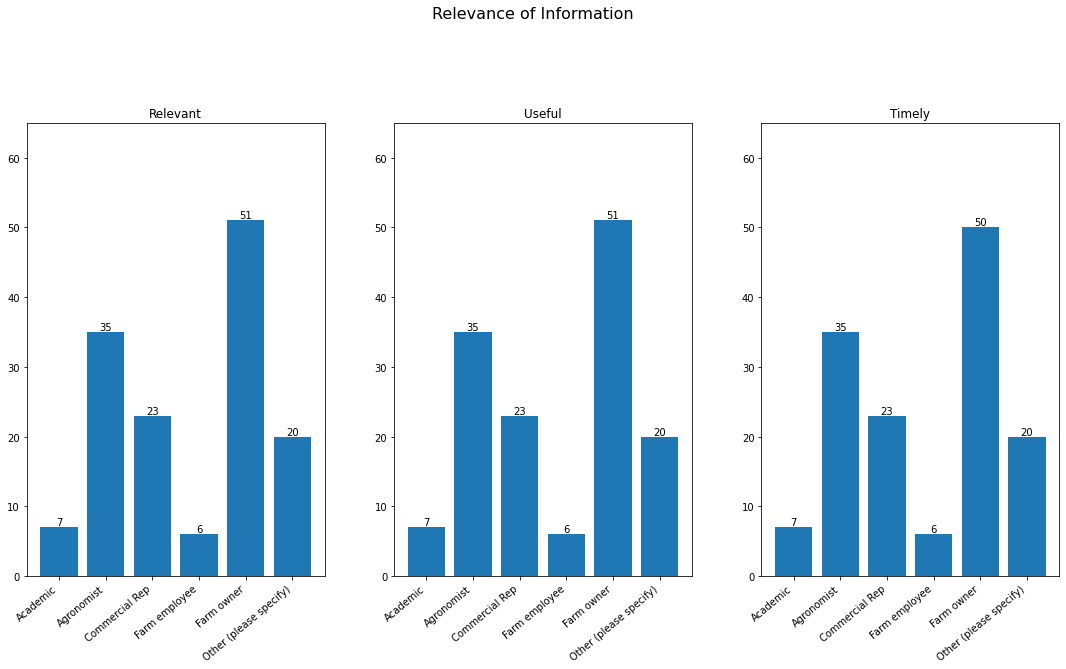

In [ ]:

cols = ['Relevant', 'Useful', 'Timely']
fig, ax = plt.subplots(1,3, figsize=(16,10))
fig.suptitle('Relevance of Information',fontsize=16)
row=0
col=[0,0,0]
for i, column in enumerate(cols):
    plot_fig = pd.DataFrame(df_clean.loc[:, ['Occupation', column]].groupby('Occupation')[column].count())
    if (i!=0)&(i%3==0):
        row+=1
    axs = ax[i]
    axs.bar(plot_fig.index,plot_fig[column])
    axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
    axs.set_title(column )
    axs.bar_label(axs.containers[0], label_type='edge')
    axs.set_ylim(0, 65)
fig.tight_layout(pad = 5)

# Gained from Weedsmart

In [ ]:
ws_rel = ws_rel.rename(columns={'What have you gained from engaging with WeedSmart? Select all that apply.  Other (please specify)':'Gained Other'})

In [ ]:
cols

[' Practical crop management strategies',
 'Data behind integrated weed management strategies.',
 'Information about on-farm practices',
 'Improved decision making',
 'Updated Information',
 'Network with industry professionals',
 'Information on weed biology and identification.',
 'No benefit',
 'Gained Other',
 'Occupation']

,Number of entries
Practical crop management strategies,113
Data behind integrated weed management strategies.,93
Information about on-farm practices,73
Improved decision making,93
Updated Information,98
Network with industry professionals,53
Information on weed biology and identification.,55
No benefit,1
Gained Other,5


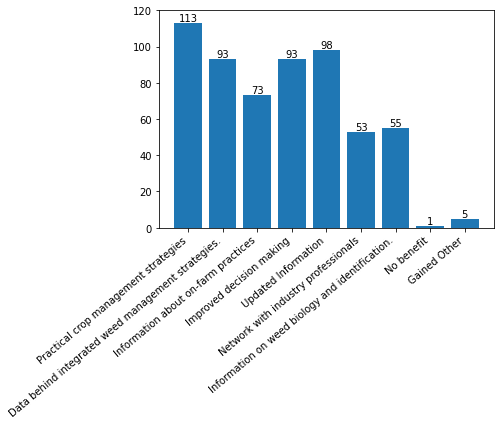

In [ ]:
plot_df_wsg=ws_rel.iloc[:, :20]
cols = list(plot_df_wsg.columns[8:17])

cols.append('Occupation')

wsr_summary = pd.DataFrame(ws_rel[cols].groupby('Occupation').count().sum(), columns = ['Number of entries']) ####
display(wsr_summary) ###

print('\n\n\n')
fig, ax = plt.subplots(1,1)
#plt.title('Implement harvest weed seed control') ###
ax.bar(wsr_summary.index,wsr_summary['Number of entries'])  ####
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 120)
plt.show()

In [ ]:
ws_rel =ws_rel.replace('Commercial rep (e.g. chemical, machinery)', 'Commercial Rep')

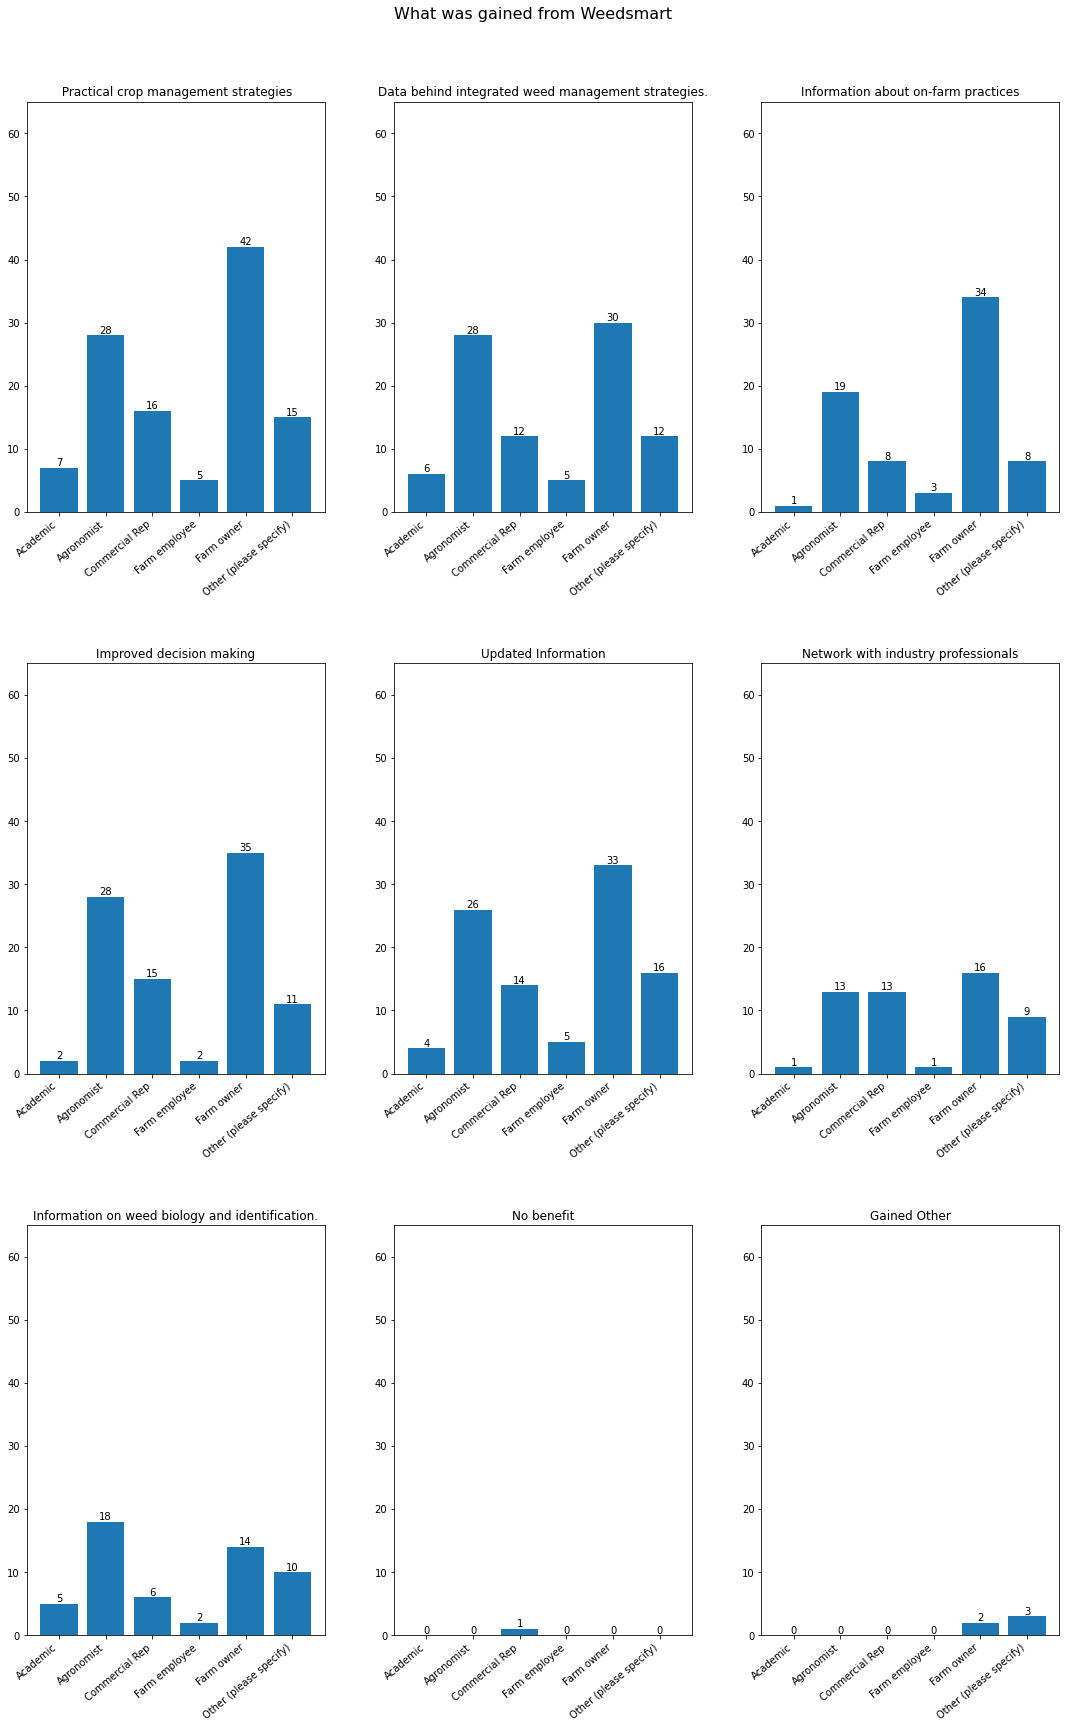

In [ ]:
cols.remove('Occupation')
fig, ax = plt.subplots(3,3, figsize=(16,25))
fig.suptitle('What was gained from Weedsmart',fontsize=16)
row=0
col=[0,1,2]*3
for i, column in enumerate(cols):
    plot_fig = pd.DataFrame(ws_rel.loc[:, ['Occupation', column]].groupby('Occupation')[column].count())
    if (i!=0)&(i%3==0):
        row+=1
    axs = ax[row,col[i]]
    axs.bar(plot_fig.index,plot_fig[column])
    axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
    axs.set_title(column )
    axs.bar_label(axs.containers[0], label_type='edge')
    axs.set_ylim(0, 65)
fig.tight_layout(pad = 5)

# How likely is it that you would recommend WeedSmart to a friend or colleague?

,Would recommend
Occupation,
Academic,8.70
Agronomist,8.80
Commercial Rep,8.20
Farm employee,8.50
Farm owner,8.50
Other (please specify),9.00


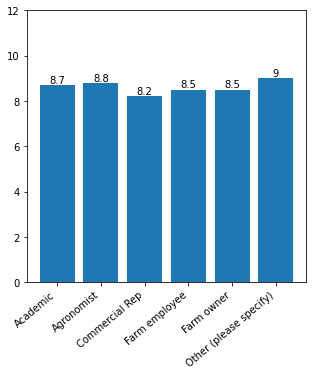

In [21]:
df_clean['Would recommend'].fillna(0, inplace = True)

rec_df = pd.DataFrame(np.round(df_clean[df_clean['Would recommend']>0].groupby('Occupation')['Would recommend'].mean(), decimals = 1))

display(rec_df)
print('\n\n\n')

# plt.bar(rec_df.index, rec_df['Would recommend'])
# plt.title('Mean Recommendation Score')
# plt.xticks(rotation=40, ha = 'right')
# plt.show()

fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.bar(rec_df.index,rec_df['Would recommend'])
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 12)
plt.show()

# Impact to your work if WeedSmart no longer existed?

In [ ]:
import numpy as np
np.round(imp_summary, decimals = 2)

,Impact to your work if WeedSmart no longer existed?
Occupation,
Academic,5.83
Agronomist,6.37
"Commercial rep (e.g. chemical, machinery)",6.30
Farm employee,6.17
Farm owner,6.35
Other (please specify),5.89


,Impact to your work if WeedSmart no longer existed?
Occupation,
Academic,5.83
Agronomist,6.37
Commercial Rep,6.30
Farm employee,6.17
Farm owner,6.35
Other (please specify),5.89


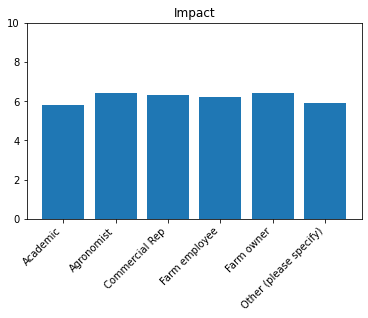

In [24]:
imp = ['Occupation', 'Impact to your work if WeedSmart no longer existed?']

imp_summary = pd.DataFrame(df_clean[imp].groupby('Occupation').mean()) ####
display(imp_summary) ###
pd.options.display.float_format = '{:,.2f}'.format

imp_summary = np.round(imp_summary, decimals = 2)

print('\n\n\n')
fig, ax = plt.subplots(1,1)
plt.title('Impact') ###
ax.bar(imp_summary.index,imp_summary['Impact to your work if WeedSmart no longer existed?'].round(decimals=1))  ####
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
#ax.xaxis.set_major_formatter("{x:.2f}")
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 10)


plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/upwork3/Weedsmart.ipynb'